# Hoodie Consumer Analysis using Data Visualization

In [1]:
#import Library
import numpy as np #for mathematical working on arrays
import pandas as pd #helps to work on dataframes or tables
import seaborn as sns #for visualising data
import plotly.express as px #for visualising data
import matplotlib.pyplot as plt #for visualising data
from matplotlib import style

# Import Data

In [2]:
df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Data Understanding

In [3]:
# filter item 'Hoodie" from 'Item Purchase'
hoodie_data = df[df['Item Purchased'] == 'Hoodie']

# show result
print(hoodie_data)

      Customer ID  Age  Gender Item Purchased  Category  \
25             26   18    Male         Hoodie  Clothing   
49             50   68    Male         Hoodie  Clothing   
58             59   69    Male         Hoodie  Clothing   
86             87   24    Male         Hoodie  Clothing   
99            100   26    Male         Hoodie  Clothing   
...           ...  ...     ...            ...       ...   
3834         3835   43  Female         Hoodie  Clothing   
3837         3838   45  Female         Hoodie  Clothing   
3849         3850   46  Female         Hoodie  Clothing   
3877         3878   28  Female         Hoodie  Clothing   
3895         3896   40  Female         Hoodie  Clothing   

      Purchase Amount (USD)    Location Size      Color  Season  \
25                       25       Texas    M     Silver  Summer   
49                       30  New Jersey    S     Indigo  Spring   
58                       54    Missouri    M   Charcoal  Summer   
86                     

In [4]:
#not using all fitur, to get my goals, i just use some fiture
df = hoodie_data[['Item Purchased','Age', 'Gender','Location','Size','Color','Purchase Amount (USD)', 'Review Rating', 'Season','Previous Purchases']]
df.head()

,Item Purchased,Age,Gender,Location,Size,Color,Purchase Amount (USD),Review Rating,Season,Previous Purchases
25,Hoodie,18,Male,Texas,M,Silver,25,3.6,Summer,14
49,Hoodie,68,Male,New Jersey,S,Indigo,30,4.6,Spring,34
58,Hoodie,69,Male,Missouri,M,Charcoal,54,4.2,Summer,29
86,Hoodie,24,Male,Nevada,L,Pink,41,3.7,Spring,47
99,Hoodie,26,Male,Missouri,XL,Indigo,40,3.7,Summer,33


In [5]:
print('Information:')
df.info()

Information:
<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 25 to 3895
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Item Purchased         151 non-null    object 
 1   Age                    151 non-null    int64  
 2   Gender                 151 non-null    object 
 3   Location               151 non-null    object 
 4   Size                   151 non-null    object 
 5   Color                  151 non-null    object 
 6   Purchase Amount (USD)  151 non-null    int64  
 7   Review Rating          151 non-null    float64
 8   Season                 151 non-null    object 
 9   Previous Purchases     151 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 13.0+ KB


In [6]:
print(df.apply(lambda col: col.unique())) #displays unique values for each coloumn 

Item Purchased                                                    [Hoodie]
Age                      [18, 68, 69, 24, 26, 21, 50, 36, 66, 45, 43, 2...
Gender                                                      [Male, Female]
Location                 [Texas, New Jersey, Missouri, Nevada, North Ca...
Size                                                         [M, S, L, XL]
Color                    [Silver, Indigo, Charcoal, Pink, Maroon, Magen...
Purchase Amount (USD)    [25, 30, 54, 41, 40, 55, 42, 53, 88, 78, 79, 7...
Review Rating            [3.6, 4.6, 4.2, 3.7, 3.2, 3.1, 4.1, 3.5, 4.8, ...
Season                                      [Summer, Spring, Winter, Fall]
Previous Purchases       [14, 34, 29, 47, 33, 22, 5, 43, 16, 32, 30, 12...
dtype: object


In [7]:
df.isnull().sum() #no. of null values in each coloumn

Item Purchased           0
Age                      0
Gender                   0
Location                 0
Size                     0
Color                    0
Purchase Amount (USD)    0
Review Rating            0
Season                   0
Previous Purchases       0
dtype: int64

In [8]:
#Checking for duplicates 
value=len(df[df.duplicated()])
print(value)

0


# Analysis and Data Visualization

In [9]:
#Calculating the percentage of Hoodie users by gender
gender_percentage = df['Gender'].value_counts(normalize=True) * 100

# show the result
print("Percentage of Hoodie Users by Gender:")
print(gender_percentage)

Percentage of Hoodie Users by Gender:
Gender
Male      66.225166
Female    33.774834
Name: proportion, dtype: float64


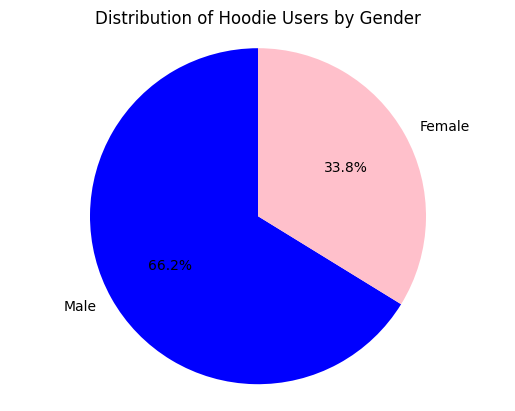

In [11]:
#Provides a visual representation of the comparison between male and female Hoodie users
gender_counts = df['Gender'].value_counts()

#Plot pie charts
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Distribution of Hoodie Users by Gender')
plt.axis('equal') 
plt.show()


In [12]:
# Calculates the average age of Hoodie users
average_age = df['Age'].mean()

print("Average Age of Hoodie Users:")
print(average_age)

Average Age of Hoodie Users:
44.87417218543046


The next experiment is to categorize Age data, this can make it easier to analyze data based on age groups, allowing statistical analysis or visualization that is more focused on the characteristics of certain age groups, such as teenagers, adults or the elderly.

In [13]:
df1 = pd.DataFrame(df)

# Convert the 'Age' column to a numeric data type if not already
df1['Age'] = pd.to_numeric(df1['Age'], errors='coerce')

# Create age categories: Teens (10-18), Adults (19-59), Elderly (60 and above)
bins = [10, 18, 59, 100]
labels = ['Teenager', 'Adult', 'Elderly']

# Added categorical age column
df1['Age Category'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)

#show thw result
print(df1[['Age', 'Age Category']])

      Age Age Category
25     18        Adult
49     68      Elderly
58     69      Elderly
86     24        Adult
99     26        Adult
...   ...          ...
3834   43        Adult
3837   45        Adult
3849   46        Adult
3877   28        Adult
3895   40        Adult

[151 rows x 2 columns]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17804\3774492516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Category', data=df1, palette='pastel')


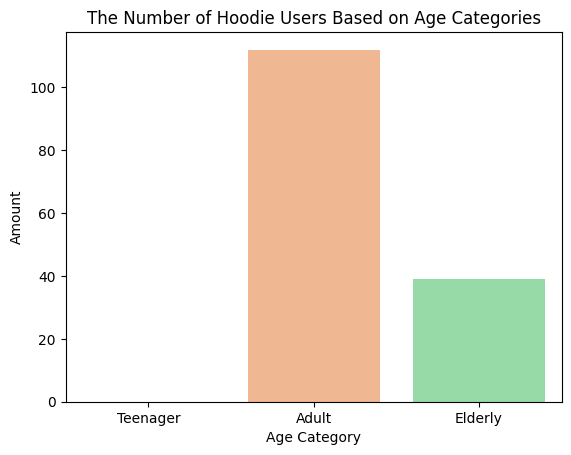

In [15]:
# Bar Chart to Show Number of Users in Each Age Category
sns.countplot(x='Age Category', data=df1, palette='pastel')
plt.title('The Number of Hoodie Users Based on Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Amount')
plt.show()

In [16]:
# Calculate the average number of Hoodie purchases for each location
average_purchase_by_location = df1.groupby('Location')['Purchase Amount (USD)'].mean()

# Average purchase format with two decimal places
for location, avg_purchase_amount in average_purchase_by_location.items():
    print(f"Average Hoodie Purchase in {location}: ${avg_purchase_amount:.2f}")

Average Hoodie Purchase in Alabama: $53.00
Average Hoodie Purchase in Alaska: $56.50
Average Hoodie Purchase in Arizona: $66.67
Average Hoodie Purchase in Arkansas: $55.25
Average Hoodie Purchase in California: $56.00
Average Hoodie Purchase in Colorado: $50.50
Average Hoodie Purchase in Connecticut: $63.00
Average Hoodie Purchase in Delaware: $79.33
Average Hoodie Purchase in Florida: $64.25
Average Hoodie Purchase in Georgia: $32.00
Average Hoodie Purchase in Hawaii: $63.25
Average Hoodie Purchase in Idaho: $66.00
Average Hoodie Purchase in Illinois: $56.50
Average Hoodie Purchase in Indiana: $23.00
Average Hoodie Purchase in Kansas: $34.50
Average Hoodie Purchase in Louisiana: $62.88
Average Hoodie Purchase in Maine: $56.00
Average Hoodie Purchase in Maryland: $64.00
Average Hoodie Purchase in Massachusetts: $79.00
Average Hoodie Purchase in Michigan: $25.50
Average Hoodie Purchase in Minnesota: $38.67
Average Hoodie Purchase in Mississippi: $79.50
Average Hoodie Purchase in Missour

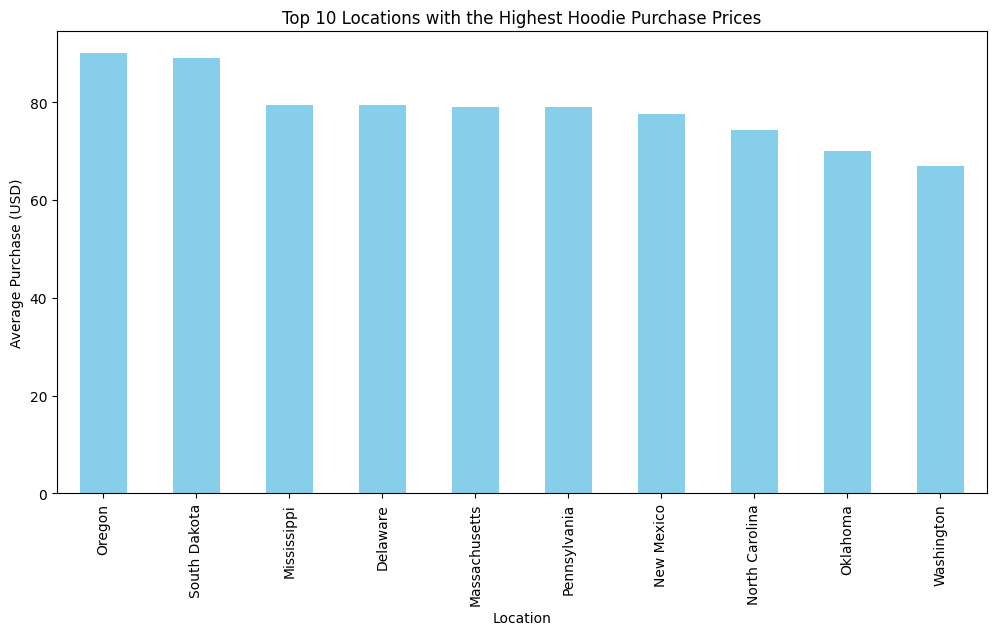

In [17]:
# Sort locations based on average purchases from highest
top_10_locations = df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False).head(10)

# Plot a bar chart for the 10 locations with the highest purchase prices
plt.figure(figsize=(12, 6))
top_10_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with the Highest Hoodie Purchase Prices')
plt.xlabel('Location')
plt.ylabel('Average Purchase (USD)')
plt.show()

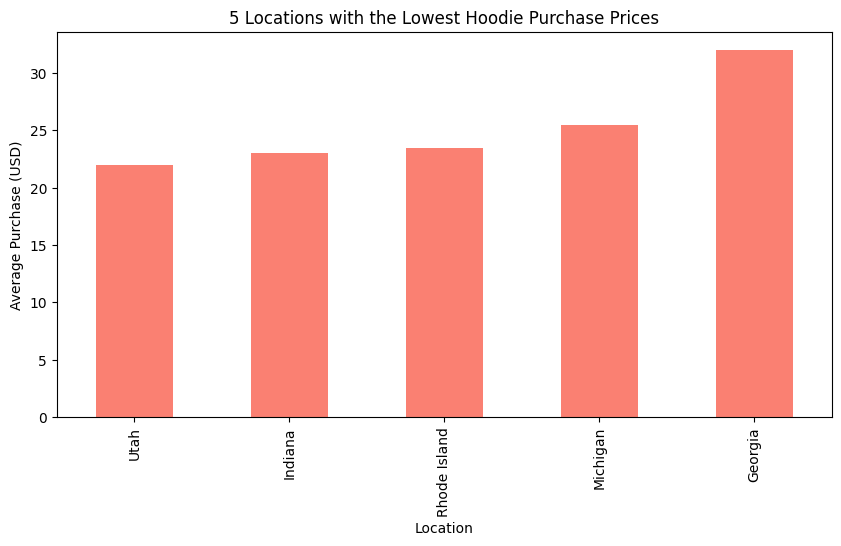

In [18]:
# Sort locations based on average purchases from lowest
bottom_5_locations = df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values().head(5)

# Plot a bar chart for the 5 locations with the lowest purchase prices
plt.figure(figsize=(10, 5))
bottom_5_locations.plot(kind='bar', color='salmon')
plt.title('5 Locations with the Lowest Hoodie Purchase Prices')
plt.xlabel('Location')
plt.ylabel('Average Purchase (USD)')
plt.show()

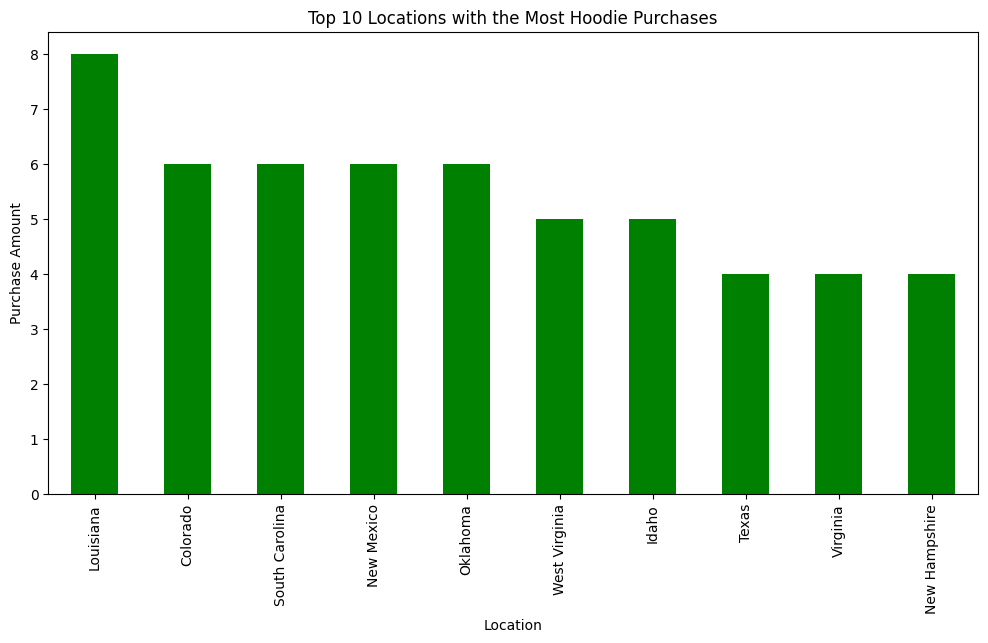

In [19]:
#visualization of 10 locations that have the highest number of Hoodie purchases

# Sort locations based on the number of Hoodie purchases from the highest
top_10_locations = df['Location'].value_counts().head(10)

# Plot a bar chart for the 10 locations with the most Hoodie purchases
plt.figure(figsize=(12, 6))
top_10_locations.plot(kind='bar', color='green')
plt.title('Top 10 Locations with the Most Hoodie Purchases')
plt.xlabel('Location')
plt.ylabel('Purchase Amount')
plt.show()


In [20]:
# Take data only for the 10 locations with the most purchases
# can help identify price patterns that may exist in various markets.
top_10_locations = df['Location'].value_counts().head(10).index
filtered_data = df[df['Location'].isin(top_10_locations)]

# Calculate the average selling price of Hoodies in each location
average_sale_price_by_location = filtered_data.groupby('Location')['Purchase Amount (USD)'].mean()

# Average sales price format with $ and two decimal places
formatted_average_sale_price = average_sale_price_by_location.map('${:.2f}'.format)

# Show results
print("Average Selling Price of Hoodies in 10 Locations with the Most Purchases:")
print(formatted_average_sale_price)

Average Selling Price of Hoodies in 10 Locations with the Most Purchases:
Location
Colorado          $50.50
Idaho             $66.00
Louisiana         $62.88
New Hampshire     $61.25
New Mexico        $77.67
Oklahoma          $70.00
South Carolina    $66.33
Texas             $44.00
Virginia          $58.50
West Virginia     $60.20
Name: Purchase Amount (USD), dtype: object


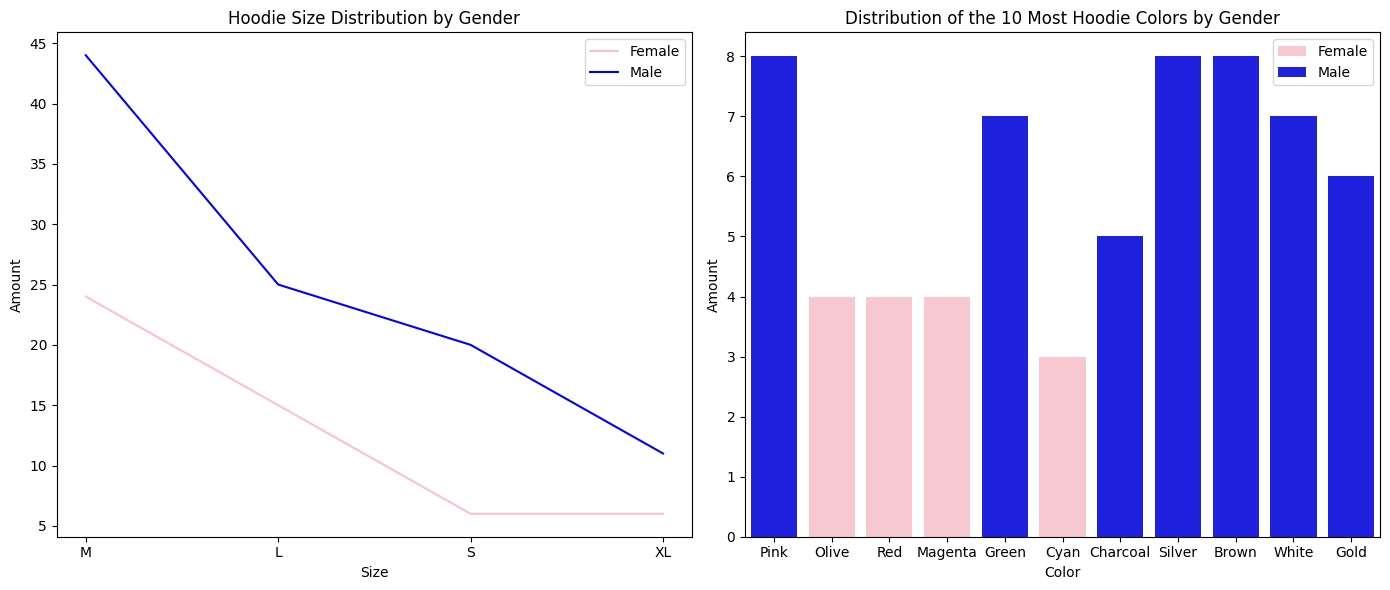

In [21]:
# Filter data by gender
female_data = df[df['Gender'] == 'Female']
male_data = df[df['Gender'] == 'Male']

# Take the 7 most colors
top_colors_female = female_data['Color'].value_counts().head(7)
top_colors_male = male_data['Color'].value_counts().head(7)

# Calculate the Hoodie size distribution for female and male
size_distribution_female = female_data['Size'].value_counts()
size_distribution_male = male_data['Size'].value_counts()

# Empil bar chart plot for size distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=size_distribution_female.index, y=size_distribution_female.values, color='pink', label='Female')
sns.lineplot(x=size_distribution_male.index, y=size_distribution_male.values, color='blue', label='Male')
plt.title('Hoodie Size Distribution by Gender')
plt.xlabel('Size')
plt.ylabel('Amount')
plt.legend()

# Plot an empil bar chart for the distribution of the 10 most colors
plt.subplot(1, 2, 2)
sns.barplot(x=top_colors_female.index, y=top_colors_female.values, color='pink', label='Female')
sns.barplot(x=top_colors_male.index, y=top_colors_male.values, color='blue', label='Male')
plt.title('Distribution of the 10 Most Hoodie Colors by Gender')
plt.xlabel('Color')
plt.ylabel('Amount')
plt.legend()

plt.tight_layout()
plt.show()

## below is an experiment to see the correlation of one feature with another

In [29]:
correlation = df['Previous Purchases'].corr(df['Review Rating'])
print(f"Correlation between Previous Purchases and Review Ratings: {correlation:.2f}")


Correlation between Previous Purchases and Review Ratings: 0.03


In [30]:
correlation = df['Previous Purchases'].corr(df['Purchase Amount (USD)'])
print(f"Correlation between Previous Purchases and Purchase Amount (USD): {correlation:.2f}")


Correlation between Previous Purchases and Purchase Amount (USD): 0.04


In [31]:
correlation = df['Previous Purchases'].corr(df['Age'])
print(f"Correlation between Previous Purchases and Age: {correlation:.2f}")


Correlation between Previous Purchases and Age: -0.07


In [32]:
correlation = df['Age'].corr(df['Purchase Amount (USD)'])
print(f"Correlation between Age and Purchase Amount (USD): {correlation:.2f}")

Correlation between Age and Purchase Amount (USD): 0.12


__Previous purchase history did not significantly correlate with product ratings or amount of money spent.
Consumer age has a weak correlation with the number of purchases, but cannot be used as a main predictor.
The low correlation suggests that other factors, beyond purchase history and age, play an important role in consumer behavior. Further analysis may be required for a deeper understandin__g.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17804\3476818006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Item Purchased', data=hoodie_by_season, palette='pastel')


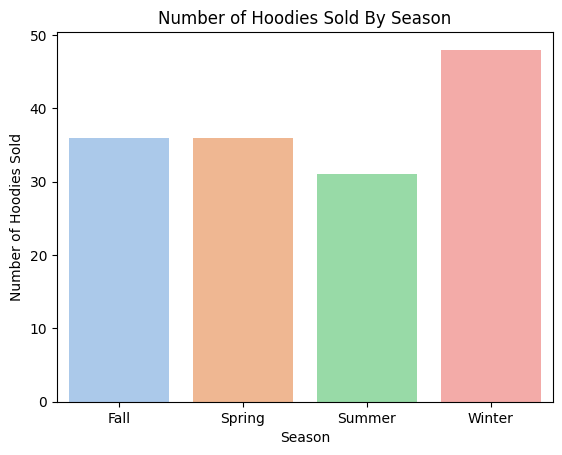

In [28]:
# Calculate the number of Hoodies sold by season
hoodie_by_season = df1.groupby('Season')['Item Purchased'].count().reset_index()

# Plot bar charts using Seaborn
sns.barplot(x='Season', y='Item Purchased', data=hoodie_by_season, palette='pastel')
plt.title('Number of Hoodies Sold By Season')
plt.xlabel('Season')
plt.ylabel('Number of Hoodies Sold')
plt.show()